In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(10):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 100
    MAX_EPISODE_LEN = 10000

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.8
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_08_nB_dqn/'
    model_path = 'model_M_08_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]

    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['model_path'] = model_path
        info['meta_path'] = info['model_path']+'.meta'
        info['init_path'] = init_path
        user_list.append(MecTermDQN_LD(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

#     sess.run(tf.global_variables_initializer())
    
#     tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

#     env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------0------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}]
INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_0-2000
Initialization OK!----> user 1
INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_0-2000
Initialization OK!----> user 2
INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_0-2000
Initialization OK!----> user 3
0:r:[   -6.47647139    -9.38046448 -2804.18920035],p:[0.7551

19:r:[   -6.35102654    -9.41149842 -2680.9795607 ],p:[0.73832578 1.02652941 0.09675   ],op:[0.00552422 0.01937059 0.        ],tr:[0.97106901 0.6178918  0.09678229],pr:[0.14312358 1.43286068 0.08872531],rev:[0.9882 2.0033 3.0235],dbuf:[2.00113270e+00 5.22149208e+00 1.34010278e+04],ch:[4.19815599 3.90103115 4.08127294],ibuf:[37.0, 43.0, 12.5],rbuf:[1.03932412e+00 1.00000000e+00 2.83924240e+04]
20:r:[   -6.48661639    -9.22136029 -2858.35401457],p:[0.7555095  1.00907384 0.04445   ],op:[0.0049405  0.01712616 0.        ],tr:[0.94914734 0.63325806 0.03540198],pr:[0.15421737 1.39912574 0.03841883],rev:[0.9832 1.9911 2.9879],dbuf:[2.01508196e+00 5.05880143e+00 1.42899921e+04],ch:[4.02435888 4.18936283 3.97253773],ibuf:[15.0, 28.5, 35.5],rbuf:[2.32472287e+00 1.13694580e+01 2.91762919e+04]
21:r:[   -6.44752892    -9.42755367 -2860.10651468],p:[0.75047793 1.03004076 0.0343    ],op:[0.00507207 0.01860924 0.        ],tr:[0.98269971 0.64537795 0.02626677],pr:[0.13948541 1.40521239 0.03210736],rev:[

40:r:[   -6.37895546    -9.39406689 -2762.37974138],p:[0.74188049 1.02564747 0.0672    ],op:[0.00426951 0.01870253 0.        ],tr:[0.98145204 0.62634732 0.05352146],pr:[0.14593388 1.4217553  0.06251084],rev:[1.0073 2.0056 2.9869],dbuf:[2.04877728e+00 5.19633444e+00 1.38092107e+04],ch:[4.23130291 3.89943765 4.12679199],ibuf:[16.0, 29.0, 5.5],rbuf:[2.57877228e+00 2.05418587e+00 2.87141770e+04]
41:r:[   -6.32948506    -9.35839658 -2869.88601436],p:[0.73471689 1.02288614 0.04135   ],op:[0.00488311 0.01961386 0.        ],tr:[0.94795124 0.65027353 0.03270038],pr:[0.1557744  1.39598539 0.04102629],rev:[0.9874 1.9992 3.0152],dbuf:[2.06342528e+00 5.09198289e+00 1.43477761e+04],ch:[3.99341609 4.08521114 3.9077648 ],ibuf:[30.5, 44.0, 31.5],rbuf:[2.93809595e+00 6.15740631e+00 2.94462333e+04]
42:r:[   -6.50366282    -9.31633223 -2918.02458534],p:[0.75587053 1.0196231  0.0369    ],op:[0.00522947 0.0196269  0.        ],tr:[0.95233936 0.63079524 0.03039984],pr:[0.1608309  1.40674546 0.03134424],rev:[1

61:r:[   -6.52591208    -9.22311731 -2739.34223172],p:[0.75857619 1.00775557 0.0656    ],op:[0.00552381 0.01949443 0.        ],tr:[0.95909778 0.62578156 0.05555595],pr:[0.1572346  1.41274221 0.06084008],rev:[1.0025 1.9931 2.979 ],dbuf:[2.06556042e+00 5.02558655e+00 1.36940872e+04],ch:[3.96681815 4.02767032 4.02898115],ibuf:[18.0, 42.0, 24.0],rbuf:[5.71049351e-01 9.70767606e+00 2.86500398e+04]
62:r:[   -6.48006703    -9.29331011 -2690.22586463],p:[0.75473697 1.01304756 0.0917    ],op:[0.00491303 0.02340244 0.        ],tr:[0.9568365  0.63212668 0.08257488],pr:[0.14772736 1.40372103 0.07902608],rev:[0.9864 1.9818 3.017 ],dbuf:[2.01433517e+00 5.00855054e+00 1.34474613e+04],ch:[3.92915589 3.94878387 3.99574189],ibuf:[20.5, 24.0, 19.5],rbuf:[5.69041994e+00 7.23150069e+00 2.85734904e+04]
63:r:[   -6.6503295     -9.35584505 -2835.66925314],p:[0.77114269 1.02222054 0.055     ],op:[0.00655731 0.02057946 0.        ],tr:[0.94360784 0.63626705 0.05328464],pr:[0.18236473 1.41034995 0.04312481],rev:[

82:r:[   -6.61045793    -9.22937592 -2800.65041171],p:[0.76685598 1.01003038 0.06125   ],op:[0.00724402 0.01621962 0.        ],tr:[0.95017739 0.61259459 0.05074121],pr:[0.17350298 1.41303649 0.06334184],rev:[1.0094 1.9884 3.0092],dbuf:[2.08828967e+00 5.09687960e+00 1.40008021e+04],ch:[3.96494759 4.09699731 4.10664964],ibuf:[16.0, 10.5, 5.5],rbuf:[0.00000000e+00 3.03602521e+00 2.89566695e+04]
83:r:[   -6.57418395    -9.39637991 -2586.59017247],p:[0.76469852 1.02676772 0.1005    ],op:[0.00460148 0.01928228 0.        ],tr:[0.9664914  0.62777866 0.10130358],pr:[0.16041887 1.41055497 0.11065039],rev:[1.0096 1.993  2.9972],dbuf:[2.09891976e+00 5.13989953e+00 1.29289309e+04],ch:[3.92805054 4.09638272 4.07597096],ibuf:[36.5, 38.0, 17.0],rbuf:[3.95187881e+00 8.70420085e+00 2.78694603e+04]
84:r:[   -6.58644152    -9.43932467 -2841.05893417],p:[0.76388019 1.03127578 0.0519    ],op:[0.00601981 0.01987422 0.        ],tr:[0.96297386 0.63172137 0.05277742],pr:[0.15535236 1.4262459  0.04114855],rev:[0

1:r:[  -4.27414916   -9.08507742 -444.38790499],p:[0.27624714 0.87195421 1.09776524],op:[2.24352861e-01 6.36457853e-02 3.47594511e-05],tr:[0.08357401 0.55028604 0.87104908],pr:[1.42231134 1.60147454 1.65177034],rev:[0.9797 2.0109 3.0055],dbuf:[1.34674582e+00 8.00138711e+00 2.17802752e+03],ch:[4.130393   4.02187553 3.79271247],ibuf:[29.5, 45.0, 1.5],rbuf:[2.41259895e+00 1.24378516e+01 4.82882491e+03]
2:r:[  -4.31006111   -8.81813468 -370.15118162],p:[0.29362866 0.8417555  1.10455   ],op:[0.20867134 0.0736445  0.        ],tr:[0.0868613  0.54773411 0.91045193],pr:[1.41166201 1.59058964 1.65399863],rev:[1.0189 1.9767 2.9784],dbuf:[1.45830554e+00 7.47467339e+00 1.80657391e+03],ch:[3.96905044 4.06816472 3.93966962],ibuf:[25.5, 46.0, 46.0],rbuf:[   0.            7.71740381 4185.49437439]
3:r:[  -4.2706044    -9.09281245 -403.28572003],p:[0.28565817 0.87097191 1.08875   ],op:[0.21344183 0.07717809 0.        ],tr:[0.08481084 0.5641459  0.89370303],pr:[1.41119954 1.60472124 1.64847425],rev:[1.00

22:r:[  -4.26127262   -8.99539292 -400.039807  ],p:[0.28385625 0.8671349  1.09475   ],op:[0.21454375 0.0639151  0.        ],tr:[0.08794768 0.53601686 0.90621452],pr:[1.40389749 1.60734942 1.64597661],rev:[0.9912 2.0094 2.9859],dbuf:[1.37036310e+00 7.73496458e+00 1.95640904e+03],ch:[3.96339738 4.00466337 3.89683137],ibuf:[6.0, 7.0, 12.0],rbuf:[   0.            6.72259078 4349.08862277]
23:r:[  -4.30060631   -9.06830161 -469.19284119],p:[0.28493132 0.87672329 1.07195   ],op:[0.21661868 0.05217671 0.        ],tr:[0.08720375 0.51898416 0.912561  ],pr:[1.40846428 1.60447839 1.63673531],rev:[0.993  2.0167 3.0255],dbuf:[1.44103157e+00 8.18550806e+00 2.30308621e+03],ch:[3.98067562 3.84353861 4.01871671],ibuf:[40.5, 7.5, 21.0],rbuf:[1.41259895e+00 1.01229763e+01 4.78303684e+03]
24:r:[  -4.33226971   -8.88030696 -308.45991777],p:[0.29180922 0.85053028 1.1378    ],op:[0.21459078 0.06301972 0.        ],tr:[0.08827861 0.52299841 0.9320432 ],pr:[1.42031792 1.59967955 1.68317582],rev:[1.0147 1.9892 2

43:r:[  -4.2959704    -8.9025473  -382.81135446],p:[0.28174978 0.85585934 1.10145   ],op:[0.21770022 0.06679066 0.        ],tr:[0.07857785 0.53329184 0.894131  ],pr:[1.41965861 1.59554511 1.65697381],rev:[0.997  1.9916 3.0008],dbuf:[1.50185202e+00 7.60673652e+00 1.86999877e+03],ch:[4.03545896 4.00394415 3.88453437],ibuf:[48.5, 6.5, 2.0],rbuf:[3.00000000e+00 7.52756305e+00 4.49895188e+03]
44:r:[  -4.26566638   -9.052992   -406.54816073],p:[0.27886149 0.86760104 1.07225   ],op:[0.22023851 0.06824896 0.        ],tr:[0.0812918  0.54933155 0.93734291],pr:[1.41174596 1.60232287 1.63761951],rev:[0.9883 2.0033 3.007 ],dbuf:[1.36433189e+00 7.83096002e+00 1.98985080e+03],ch:[3.96233179 4.01818042 4.09483267],ibuf:[4.0, 16.5, 39.0],rbuf:[2.82519790e+00 6.35451211e+00 4.35937573e+03]
45:r:[  -4.33698865   -9.01010672 -403.41503087],p:[0.28849649 0.8664217  1.13085   ],op:[0.21745351 0.0650783  0.        ],tr:[0.08172263 0.54808848 0.86521519],pr:[1.43231197 1.60469935 1.67886072],rev:[1.0127 2.019

64:r:[  -4.26165335   -8.84178199 -162.70609156],p:[0.28233973 0.85070004 1.27143233],op:[2.15460274e-01 5.45999625e-02 1.67672548e-04],tr:[0.07175622 0.51782793 1.00358423],pr:[1.4213589  1.59431976 1.7371455 ],rev:[1.0039 1.9995 3.0026],dbuf:[  1.39626675   7.99690993 762.6664578 ],ch:[4.02739793 3.87977746 4.02773116],ibuf:[12.0, 29.0, 42.0],rbuf:[2.00000000e+00 6.72417849e+00 2.66448146e+03]
65:r:[  -4.27734854   -9.03630075 -419.27239311],p:[0.28671111 0.86733901 1.0633    ],op:[0.21313889 0.05811099 0.        ],tr:[0.08613264 0.54355837 0.94967872],pr:[1.4081362  1.59660896 1.63289228],rev:[1.009  2.014  3.0147],dbuf:[1.39274269e+00 8.16350377e+00 2.05382997e+03],ch:[3.91358546 3.90027472 4.17227566],ibuf:[10.0, 46.0, 28.0],rbuf:[2.41259895e+00 8.88819264e+00 4.34928999e+03]
66:r:[  -4.27642783   -8.89565124 -206.54395693],p:[0.28586539 0.85739641 1.24495   ],op:[0.21263461 0.05945359 0.        ],tr:[0.08853215 0.51224357 0.97223661],pr:[1.39790663 1.59501088 1.73636468],rev:[0.9

85:r:[  -4.24081987   -9.02423106 -390.03732431],p:[0.27991253 0.86575057 1.11185   ],op:[0.21588747 0.07409943 0.        ],tr:[0.07753701 0.54557667 0.89287405],pr:[1.40580237 1.61234823 1.66332551],rev:[0.9872 2.0055 2.9829],dbuf:[1.37209934e+00 7.52715529e+00 1.90571262e+03],ch:[4.0275728  4.12241212 3.93510659],ibuf:[25.5, 0.5, 28.0],rbuf:[   9.41259895   10.19242531 4295.004389  ]
86:r:[  -4.21335188   -9.07469922 -346.45770945],p:[0.27840087 0.87474885 1.1522    ],op:[0.21439913 0.06220115 0.        ],tr:[0.07225053 0.52914137 0.94834495],pr:[1.39659545 1.60462698 1.67255495],rev:[0.9918 2.0024 3.0483],dbuf:[1.35475940e+00 7.89549610e+00 1.68620055e+03],ch:[3.87300633 3.92252407 4.10545971],ibuf:[1.5, 45.0, 18.0],rbuf:[0.00000000e+00 4.04523440e+00 4.29200105e+03]
87:r:[  -4.3697294    -8.66851098 -100.46528738],p:[0.29372207 0.83593176 1.31324428],op:[0.21317793 0.07066824 0.00030572],tr:[0.08916561 0.55351607 0.99336472],pr:[1.41610214 1.57446901 1.77327359],rev:[1.0143 1.9816 

4:r:[ -4.11284497  -9.12260747 -63.92830307],p:[0.42734915 0.92326753 1.7537    ],op:[0.00095085 0.00783247 0.        ],tr:[0.24592494 0.80334196 1.49625465],pr:[0.7344558  1.25025997 1.5078    ],rev:[0.9788 2.0334 3.0249],dbuf:[  3.43222484   8.36903736 249.49351537],ch:[3.9586238  4.03645409 4.1415867 ],ibuf:[6.5, 26.0, 44.0],rbuf:[  4.20676321  13.74248541 252.45349926]
5:r:[ -4.20963574  -8.9493103  -64.02534704],p:[0.43776385 0.91524218 1.7595    ],op:[0.00083615 0.00845782 0.        ],tr:[0.25513779 0.77258129 1.43344548],pr:[0.7500885  1.24715427 1.51908683],rev:[1.004  1.999  2.9731],dbuf:[  3.50417868   7.7985515  249.74673518],ch:[4.02858257 3.92998935 3.92896869],ibuf:[3.0, 28.5, 48.5],rbuf:[  2.03275772   4.36764005 254.17690064]
6:r:[ -4.11071644  -9.04668336 -60.60623784],p:[0.42579825 0.91784123 1.77776561],op:[0.00090175 0.00630877 0.00023439],tr:[0.24922339 0.78948843 1.37837626],pr:[0.73927268 1.23697564 1.60631085],rev:[0.9866 2.0096 3.0063],dbuf:[  3.48558222   8.26

26:r:[ -4.30295083  -9.00437174 -60.94442239],p:[0.44659097 0.9128397  1.78523005],op:[0.00135903 0.0074603  0.00031995],tr:[0.25360874 0.82590511 1.39733527],pr:[0.7629277  1.21035563 1.60551561],rev:[1.0103 2.0166 3.0234],dbuf:[  3.59675416   8.20985871 233.30011193],ch:[3.93265606 4.15081321 3.94380636],ibuf:[45.0, 19.5, 37.5],rbuf:[  1.81729318  12.14071752 250.07120059]
27:r:[ -4.17676946  -8.71056248 -63.21682829],p:[0.43349711 0.90233517 1.76615   ],op:[0.00115289 0.00891483 0.        ],tr:[0.25128005 0.77254154 1.44800292],pr:[0.75910716 1.23288183 1.53833602],rev:[1.006  1.9848 3.0073],dbuf:[  3.49784732   7.10281239 245.43814143],ch:[3.96834649 3.92172718 4.03585358],ibuf:[30.0, 20.5, 46.0],rbuf:[  1.98772976   8.66727097 255.61064769]
28:r:[ -4.21759892  -8.7583522  -49.31467832],p:[0.43744697 0.90145732 1.74989143],op:[0.00120303 0.00929268 0.00245857],tr:[0.2512009  0.79533025 1.28439258],pr:[0.75907283 1.21064796 1.71059831],rev:[1.0082 1.982  3.0161],dbuf:[  3.54199461  

48:r:[ -4.16904301  -8.87776699 -59.175685  ],p:[0.43058    0.90231905 1.76138785],op:[0.00147    0.00793095 0.00056215],tr:[0.25260888 0.81546575 1.39989054],pr:[0.75257502 1.21527913 1.58363948],rev:[1.0006 2.006  3.0054],dbuf:[  3.56321507   7.97883497 225.400425  ],ch:[4.14585837 4.09670768 4.00313903],ibuf:[26.0, 36.5, 17.0],rbuf:[  2.89002193   7.81920519 246.78119934]
49:r:[ -4.13001146  -8.9890559  -58.60276247],p:[0.42844597 0.90811203 1.78347316],op:[0.00130403 0.00833797 0.00042684],tr:[0.24115237 0.82074585 1.3564888 ],pr:[0.73557117 1.20587209 1.64358773],rev:[0.9728 2.0016 3.0251],dbuf:[  3.46005729   8.28727949 221.65781237],ch:[3.92168856 4.1755287  4.03789011],ibuf:[25.5, 45.5, 0.5],rbuf:[  5.05026759  12.35701332 256.67570184]
50:r:[ -4.22394421  -8.9880949  -54.90875533],p:[0.43774843 0.91663376 1.78150447],op:[0.00130157 0.00566624 0.00014553],tr:[0.24688222 0.77239133 1.30935943],pr:[0.75821652 1.2438672  1.66890361],rev:[0.9993 1.9984 2.999 ],dbuf:[  3.55772104   

70:r:[ -4.17175098  -9.31640922 -61.06350947],p:[0.43396681 0.94552237 1.76273906],op:[0.00088319 0.00952763 0.00071094],tr:[0.25238201 0.74579128 1.42490884],pr:[0.74240262 1.31478247 1.55455447],rev:[0.9932 2.0391 3.0007],dbuf:[  3.4647549    8.3800461  234.77954737],ch:[4.0173307  3.79460053 4.01096572],ibuf:[9.0, 13.0, 22.5],rbuf:[  4.59326389   8.01346382 252.88370849]
71:r:[ -4.13616607  -9.06483229 -55.35294226],p:[0.42997037 0.92242848 1.76770356],op:[0.00107963 0.00532152 0.00064644],tr:[0.24964953 0.81511302 1.35062178],pr:[0.74099262 1.22475218 1.65606538],rev:[0.9877 2.0243 3.0246],dbuf:[  3.43883035   8.21416147 206.0307113 ],ch:[3.96787916 4.11556407 4.05874555],ibuf:[19.5, 8.0, 29.0],rbuf:[  6.3249574    5.95660838 221.49245247]
72:r:[ -4.28115107  -8.86344789 -61.22796229],p:[0.44223929 0.90277217 1.77525   ],op:[0.00106071 0.00862783 0.0002    ],tr:[0.24882767 0.7818811  1.42079822],pr:[0.75855107 1.22849689 1.58042734],rev:[1.0014 1.9854 3.0244],dbuf:[  3.67375535   7

92:r:[ -4.21540297  -8.97770449 -63.98133251],p:[0.43801709 0.91822096 1.76945   ],op:[0.00113291 0.00972904 0.        ],tr:[0.25140633 0.78396927 1.42297347],pr:[0.7468005  1.23843507 1.53917366],rev:[0.993  1.9958 2.9831],dbuf:[  3.51101484   7.77052245 249.12866256],ch:[4.0053216  3.95675423 3.94790498],ibuf:[39.5, 45.5, 46.5],rbuf:[  4.73777825   2.03086615 256.02872748]
93:r:[ -4.11858002  -8.9449514  -63.70722668],p:[0.42635848 0.90940907 1.7599    ],op:[0.00104152 0.00674093 0.        ],tr:[0.24920485 0.82322814 1.44735488],pr:[0.73799449 1.19606781 1.52049203],rev:[0.9843 1.9997 2.9902],dbuf:[  3.49690009   8.07875698 248.14013342],ch:[4.13614102 4.18659328 4.05620622],ibuf:[18.5, 31.0, 36.5],rbuf:[  3.96270132   7.66505848 260.03096339]
94:r:[ -4.2077768   -8.89330427 -54.96606399],p:[0.43347941 0.91101339 1.7842249 ],op:[0.00107059 0.00668661 0.0009251 ],tr:[0.26531658 0.78856387 1.30277631],pr:[0.74264825 1.22593939 1.67195864],rev:[1.0035 1.996  2.9979],dbuf:[  3.65688399  

12:r:[ -4.97283613 -68.23678581 -16.47614019],p:[0.4762     0.95875    1.65780957],op:[0.00000000e+00 0.00000000e+00 4.04286186e-05],tr:[7.76555379e-01 3.36879412e-04 1.19532578e+00],pr:[0.3235407  1.96587807 1.79832199],rev:[1.005  1.9958 2.9928],dbuf:[  5.81618066 302.83392906  16.06670097],ch:[4.01880415 3.93083711 3.92896293],ibuf:[21.5, 29.5, 37.0],rbuf:[ 11.7107564  325.35053591  29.40545406]
13:r:[ -4.97672876 -56.21533969 -16.30365191],p:[0.4706     0.9527     1.66352691],op:[0.00000000e+00 0.00000000e+00 2.30906284e-05],tr:[0.74973547 0.         1.21306205],pr:[0.34086227 1.96096814 1.80207651],rev:[0.9973 1.9891 3.0141],dbuf:[  6.0596438  242.96869846  14.97625954],ch:[4.02624553 4.09819699 3.9285724 ],ibuf:[43.5, 21.5, 18.5],rbuf:[  2.43720344 302.81860484   8.46077304]
14:r:[ -4.92099463 -63.66364483 -15.62614336],p:[0.47186931 0.96715    1.59812588],op:[3.06935558e-05 0.00000000e+00 7.41222552e-05],tr:[0.79773039 0.         1.22692847],pr:[0.29510732 1.97289225 1.75926104]

34:r:[ -4.87038143 -54.52828558 -16.1710102 ],p:[0.464   0.93825 1.6369 ],op:[0. 0. 0.],tr:[7.54981263e-01 1.08412611e-03 1.21719709e+00],pr:[0.32881755 1.94859647 1.78032579],rev:[0.9757 1.9744 2.9981],dbuf:[  5.79190713 235.11142788  15.37905101],ch:[3.95328275 4.0600913  4.10705492],ibuf:[17.5, 21.0, 7.0],rbuf:[  1.         268.19403338  12.77117276]
35:r:[ -4.9794018  -61.99417931 -16.13978884],p:[0.47289401 0.9671     1.63927541],op:[5.98587184e-06 0.00000000e+00 1.24591436e-04],tr:[0.76306783 0.         1.21618677],pr:[0.33669093 1.97285099 1.78581242],rev:[1.0093 2.0006 3.0019],dbuf:[  5.98100899 271.28689654  15.12294421],ch:[4.01613995 3.91403992 3.99335307],ibuf:[3.5, 42.5, 16.0],rbuf:[  2.47130102 319.9901078   16.03069902]
36:r:[ -4.9337848  -66.00581138 -16.2941927 ],p:[0.4718     0.9616     1.64868787],op:[0.         0.         0.00011213],tr:[0.79564975 0.00169098 1.20029046],pr:[0.31311204 1.96781728 1.79501334],rev:[0.9942 2.0016 2.9922],dbuf:[  5.796924   291.56505692

56:r:[ -5.02924569 -55.58459073 -15.87231964],p:[0.472  0.9584 1.6203],op:[0. 0. 0.],tr:[0.72909402 0.         1.23045771],pr:[0.35869502 1.96567177 1.76960102],rev:[1.0046 1.9908 2.9963],dbuf:[  6.26622844 239.58695367  14.5495982 ],ch:[3.94078622 4.03755905 4.240096  ],ibuf:[46.0, 24.0, 48.0],rbuf:[  8.83537416 275.28232476  10.41271088]
57:r:[ -4.98560608 -61.43509697 -16.46704497],p:[0.47075    0.9711     1.66392938],op:[0.0000000e+00 0.0000000e+00 7.0617613e-05],tr:[0.76271384 0.         1.2262812 ],pr:[0.3418566  1.97615178 1.78979915],rev:[1.0014 2.0083 3.0158],dbuf:[  6.09803041 268.33148483  15.77522485],ch:[4.0194537  3.93707226 4.03486506],ibuf:[42.5, 44.5, 12.5],rbuf:[ 12.06495414 365.98219196  10.46662883]
58:r:[ -4.96733595 -62.21345719 -16.39907001],p:[0.47049308 0.97055    1.66036694],op:[6.91645536e-06 0.00000000e+00 3.30558022e-05],tr:[7.60389037e-01 5.67653636e-04 1.23985861e+00],pr:[0.34414888 1.97553288 1.79348122],rev:[1.0204 1.9961 3.0335],dbuf:[  6.01667973 272.

78:r:[ -4.94015635 -57.23760349 -15.95880273],p:[0.4739  0.9568  1.62175],op:[0. 0. 0.],tr:[0.79987567 0.00247946 1.22905337],pr:[0.3137659  1.96301535 1.77206063],rev:[0.9982 1.9859 2.9971],dbuf:[  5.74478173 247.91601744  14.92401366],ch:[4.09845185 3.93045885 4.13351451],ibuf:[18.5, 13.5, 48.0],rbuf:[  1.46318307 217.55181092   7.86003976]
79:r:[ -5.01843046 -52.53529227 -15.85720949],p:[0.46995    0.9324     1.62347672],op:[0.00000000e+00 0.00000000e+00 2.32833169e-05],tr:[0.72012701 0.00122559 1.19398   ],pr:[0.36624871 1.9435341  1.78064559],rev:[1.0087 1.9778 2.9753],dbuf:[  6.29415229 225.38046133  14.34604744],ch:[3.78430613 4.03891807 3.95474485],ibuf:[24.5, 3.5, 5.5],rbuf:[  9.2360897  333.90309035  12.39025963]
80:r:[ -5.01200683 -56.93700728 -16.29895756],p:[0.4705125 0.95155   1.65015  ],op:[3.75e-05 0.00e+00 0.00e+00],tr:[0.74100691 0.00144111 1.21557573],pr:[0.34708809 1.95948908 1.79023394],rev:[1.0108 1.9886 3.0049],dbuf:[  6.23803416 246.62303642  15.48878781],ch:[3.

INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_4-2000
Initialization OK!----> user 1
INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_4-2000
Initialization OK!----> user 2
INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_4-2000
Initialization OK!----> user 3
0:r:[ -6.08298263 -13.07171567 -18.3838156 ],p:[0.58935167 1.3097591  1.97076733],op:[0.12939833 0.0010409  0.06478267],tr:[0.66898313 1.01099371 1.53580088],pr:[0.74902991 0.9866147  1.69702799],rev:[1.0147 1.9958 3.0149],dbuf:[ 1.66491314 12.92657835 10.49707798],ch:[4.01757099 4.05441604 3.92881487],ibuf:[11.5, 6.5, 26.0],rbuf:[ 2.79468272 15.47506089  2.49674589]
1:r:[ -5.99412199 -12.76455842 -18.04771521],p:[0.56956038 1.29353811 1.93910922],op:[0.13953962 0.00311189 0.07479078],tr:[0.62660952 1.00236587 1.51602823],pr:[0.76935999 1.01088795 1.70657478],rev:[0.9991 2.0074 2.9806],dbuf:[ 1.60660997 11.95679208  9.68257606],ch:[3.88085232 4.12799314

22:r:[ -6.09521262 -13.12423997 -18.09307244],p:[0.58893616 1.3211361  1.95542113],op:[0.12956384 0.0004639  0.06142887],tr:[0.67176669 1.02109926 1.49237039],pr:[0.7601348  0.99110398 1.70564018],rev:[1.0206 2.0083 2.9925],dbuf:[ 1.73606308 12.75719987  9.79136219],ch:[3.96026367 4.01812198 3.88243803],ibuf:[43.5, 42.5, 34.5],rbuf:[ 2.09564354 12.55499904  5.        ]
23:r:[ -5.99140568 -13.26096374 -18.38338082],p:[0.57963041 1.33945765 1.97628253],op:[0.12836959 0.00089235 0.06516747],tr:[0.64065204 0.99396397 1.56591633],pr:[0.74933763 1.04739225 1.69460778],rev:[1.0104 2.0368 3.0394],dbuf:[ 1.63702841 12.6908187  10.25890408],ch:[3.88501965 3.87703375 3.99749789],ibuf:[18.5, 27.0, 43.0],rbuf:[ 1.          5.70660825 18.84259432]
24:r:[ -6.0249622  -12.84407772 -18.29382855],p:[0.57962759 1.2966707  1.97245187],op:[0.13322241 0.0025293  0.06269813],tr:[0.68239346 0.99230222 1.52257365],pr:[0.73700472 1.01121033 1.70095245],rev:[0.9943 1.9975 3.0176],dbuf:[ 1.61081102 12.25238859 10

45:r:[ -5.94440074 -13.20992013 -18.17233164],p:[0.56696636 1.32436474 1.95805012],op:[0.13593364 0.00233526 0.06949988],tr:[0.63474526 1.04822625 1.53858462],pr:[0.76002991 0.97126473 1.69850649],rev:[0.9953 2.0128 2.9976],dbuf:[ 1.60600372 12.98160065  9.75965819],ch:[3.85485511 4.1277539  4.03074845],ibuf:[16.0, 38.0, 9.0],rbuf:[ 2.29662477 13.29052348  4.        ]
46:r:[ -6.05821803 -13.3928595  -18.02852349],p:[0.57334931 1.3380212  1.94592088],op:[0.14265069 0.0003788  0.06827912],tr:[0.63151938 1.02129367 1.54309336],pr:[0.78925858 0.98504902 1.70606841],rev:[1.0075 2.0031 3.0072],dbuf:[ 1.65109015 13.42829749  9.57461747],ch:[3.85200877 3.92291616 4.12081646],ibuf:[47.5, 43.0, 19.5],rbuf:[ 1.         17.18691165  8.76640294]
47:r:[ -6.11248824 -12.92715259 -17.89362844],p:[0.60145962 1.31463329 1.93074158],op:[0.11984038 0.00216671 0.07845842],tr:[0.70559889 0.97726775 1.55052159],pr:[0.73408377 1.04862232 1.71158126],rev:[1.0317 2.0173 2.9957],dbuf:[ 1.71044119 11.96376295  9.

68:r:[ -6.07042728 -12.92119017 -18.09516366],p:[0.59435977 1.30483764 1.94864477],op:[0.12504023 0.00226236 0.07085523],tr:[0.72647937 1.00666599 1.5347169 ],pr:[0.70286204 1.00196478 1.69931368],rev:[0.9887 1.9998 3.001 ],dbuf:[ 1.57613642 12.32195084  9.69581828],ch:[4.11551547 3.97894607 3.97977995],ibuf:[34.5, 49.0, 16.5],rbuf:[ 0.         14.06065408 25.94013075]
69:r:[ -6.05372522 -13.21318069 -18.40781969],p:[0.57820781 1.33200884 1.98205885],op:[0.13749219 0.00209116 0.06509115],tr:[0.65409251 0.99115073 1.53300533],pr:[0.74518894 1.01734584 1.69896512],rev:[0.9919 2.0036 3.0126],dbuf:[ 1.64062611 12.70190345 10.15309844],ch:[3.97946058 3.84509414 3.97698104],ibuf:[46.0, 22.5, 27.5],rbuf:[1.         9.24988609 6.51371344]
70:r:[ -5.96858207 -12.97542109 -18.02474298],p:[0.58875524 1.30113617 1.94693896],op:[0.11649476 0.00326383 0.06751104],tr:[0.70076994 1.00806266 1.49860083],pr:[0.70200528 0.97854014 1.70364799],rev:[0.9957 1.9803 2.97  ],dbuf:[ 1.63291035 12.70110544  9.54

91:r:[ -6.01824657 -13.21134985 -18.2150563 ],p:[0.58239555 1.33248727 1.96988673],op:[0.12900445 0.00096273 0.06376327],tr:[0.63983105 0.98582633 1.5353533 ],pr:[0.76420556 1.02518767 1.69780793],rev:[1.0092 2.0076 3.0209],dbuf:[ 1.63523283 12.71874924  9.72928149],ch:[3.93754009 3.94734049 4.04887851],ibuf:[34.0, 34.5, 24.0],rbuf:[ 6.63821752 16.19027923  3.        ]
92:r:[ -5.97825248 -13.21595579 -18.25960876],p:[0.57926265 1.32657834 1.95452988],op:[0.12698735 0.00287166 0.06677012],tr:[0.65203217 1.00089538 1.50383266],pr:[0.75537463 1.00817312 1.70330511],rev:[1.0069 2.0036 2.9875],dbuf:[ 1.64126238 12.90177897 10.44604379],ch:[3.96841818 4.02598671 4.05503409],ibuf:[33.5, 24.5, 2.5],rbuf:[ 0.78690271 12.15164525  8.74263066]
93:r:[ -5.9651022  -12.82245424 -18.02832247],p:[0.56484671 1.29239355 1.94934458],op:[0.14200329 0.00185645 0.06720542],tr:[0.62093959 0.97370358 1.52807458],pr:[0.77259495 1.00830116 1.70086019],rev:[0.9851 1.9768 3.0007],dbuf:[ 1.55151099 12.34227121  9.

11:r:[ -6.34961448  -8.99938039 -55.573652  ],p:[0.72795017 0.9789441  2.0493    ],op:[0.00314983 0.0157059  0.        ],tr:[0.87538938 0.58134694 0.76569622],pr:[0.20021461 1.46366397 2.23661013],rev:[1.0112 1.9994 3.0208],dbuf:[  2.50407238   5.21090196 195.89626   ],ch:[4.03739847 3.83626625 3.91266851],ibuf:[44.0, 36.5, 16.0],rbuf:[  3.30362718  13.72611857 200.9365475 ]
12:r:[ -6.45107536  -9.01917104 -55.32454161],p:[0.74263986 0.97837778 2.0424    ],op:[0.00331014 0.01787222 0.        ],tr:[0.87643656 0.6160082  0.73365966],pr:[0.1905228  1.44528199 2.23857396],rev:[1.0029 2.0074 2.9909],dbuf:[  2.41737682   5.24585521 194.92670807],ch:[3.97673123 4.03324796 3.85126596],ibuf:[10.0, 35.0, 5.0],rbuf:[  3.04353483   5.78842965 191.66382268]
13:r:[ -6.40619282  -9.04383113 -55.47008185],p:[0.73800014 0.98275575 2.0377    ],op:[0.00289986 0.01819425 0.        ],tr:[0.87447711 0.59944579 0.74070249],pr:[0.19813285 1.45543923 2.23721179],rev:[1.0027 1.9967 2.9928],dbuf:[  2.3949641    

33:r:[ -6.44459373  -8.97247981 -54.99872617],p:[0.74127856 0.97499359 1.9963    ],op:[0.00302144 0.01860641 0.        ],tr:[0.85992477 0.61999204 0.77154116],pr:[0.2114892  1.44244401 2.20934947],rev:[1.0103 2.003  2.9958],dbuf:[  2.45096865   5.11839906 195.14163083],ch:[3.87021352 4.03723107 4.13471425],ibuf:[28.0, 34.0, 46.5],rbuf:[  2.78277587   4.74592426 195.5937116 ]
34:r:[ -6.33075294  -9.136831   -55.38847689],p:[0.72919035 0.99188959 2.0251    ],op:[0.00185965 0.01981041 0.        ],tr:[0.87107053 0.61106713 0.80134538],pr:[0.21130001 1.45086272 2.2164356 ],rev:[1.0122 2.0028 3.035 ],dbuf:[  2.41176469   5.216155   195.93838444],ch:[4.04639689 3.96702561 4.13122384],ibuf:[25.5, 38.5, 30.5],rbuf:[  1.72711068   4.23779684 202.69012056]
35:r:[ -6.3483815   -9.06296597 -54.8047473 ],p:[0.73274431 0.98689628 1.9831    ],op:[0.00270569 0.01785372 0.        ],tr:[0.86158408 0.62578611 0.75150299],pr:[0.18461289 1.45148243 2.20351852],rev:[0.9786 2.0245 2.9733],dbuf:[  2.32390748  

55:r:[ -6.41410985  -8.98125871 -55.3618369 ],p:[0.73846465 0.97563115 2.0371    ],op:[0.00198535 0.01891885 0.        ],tr:[0.88052909 0.61546629 0.75374373],pr:[0.19365041 1.44250433 2.23763678],rev:[1.0119 1.9995 3.0064],dbuf:[  2.45254924   5.12429354 195.3251845 ],ch:[3.92750034 4.04556868 3.87003781],ibuf:[3.0, 13.0, 36.5],rbuf:[  0.           2.15647424 186.69490041]
56:r:[ -6.55317658  -8.99556225 -55.55810653],p:[0.75227804 0.97855679 2.0449    ],op:[0.00497196 0.01414321 0.        ],tr:[0.84903906 0.57593858 0.77761403],pr:[0.23481543 1.47025535 2.22811541],rev:[1.0147 1.9991 3.0247],dbuf:[  2.47588292   5.26981124 195.99453263],ch:[3.83242786 3.85791168 4.01188465],ibuf:[15.0, 36.0, 15.0],rbuf:[  2.57373614   4.52125913 204.70563931]
57:r:[ -6.40000145  -9.03483861 -55.28021707],p:[0.73715304 0.98146901 2.034     ],op:[0.00249696 0.01828099 0.        ],tr:[0.86654289 0.61026758 0.76869167],pr:[0.20451094 1.44855945 2.22828775],rev:[1.0079 2.0019 3.0137],dbuf:[  2.41400726   

77:r:[ -6.41226847  -9.03928126 -55.65303665],p:[0.73740633 0.98274451 2.0612    ],op:[0.00379367 0.01685549 0.        ],tr:[0.86780755 0.60576891 0.78035841],pr:[0.2025297  1.44574859 2.24178998],rev:[0.9986 2.0005 3.0406],dbuf:[  2.41334237   5.21240631 195.81718323],ch:[3.92074792 3.99488983 3.95014711],ibuf:[22.5, 38.5, 17.5],rbuf:[  2.           4.9853306  202.01613737]
78:r:[ -6.40051596  -8.865122   -54.5738109 ],p:[0.73531623 0.96351427 1.9765    ],op:[0.00383377 0.01758573 0.        ],tr:[0.8554473  0.60145211 0.7480624 ],pr:[0.21028479 1.44281602 2.20284828],rev:[0.994  1.9919 2.9667],dbuf:[  2.43657981   5.08161002 193.80905452],ch:[3.98920215 4.01891682 4.05677126],ibuf:[31.0, 17.5, 35.5],rbuf:[  1.12949472   6.         193.39323996]
79:r:[ -6.53344624  -9.15394779 -55.22822926],p:[0.75163068 0.99705495 2.0339    ],op:[0.00446932 0.01744505 0.        ],tr:[0.85725313 0.61907998 0.74960554],pr:[0.20291175 1.45770133 2.2330971 ],rev:[0.9987 2.0257 2.9994],dbuf:[  2.42323118  

99:r:[ -6.31517288  -8.93487329 -55.18651632],p:[0.72688267 0.97076849 2.019     ],op:[0.00276733 0.01938151 0.        ],tr:[0.85451382 0.61289594 0.76349558],pr:[0.20739751 1.44000148 2.22512735],rev:[1.0003 1.9925 3.0041],dbuf:[  2.38986438   5.06836645 195.17258158],ch:[3.9355364  3.95436166 4.00231783],ibuf:[12.5, 37.5, 37.0],rbuf:[  5.23717495   5.97685139 191.77069192]
---------6------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}]
INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_6-2000
Initialization OK!----> user 1
INFO:ten

18:r:[   -3.44655631   -10.77524213 -1652.96281712],p:[0.31211876 1.13115505 1.4821    ],op:[0.05473124 0.02139495 0.        ],tr:[0.10844175 1.04676408 0.51799431],pr:[0.9815811  1.06264601 1.50299608],rev:[0.9772 2.0114 3.0153],dbuf:[2.55878153e+00 7.77421066e+00 8.20553009e+03],ch:[4.12296678 4.04126777 4.06421989],ibuf:[24.5, 20.5, 46.0],rbuf:[4.12598948e-01 6.12985345e+00 9.98909618e+03]
19:r:[   -3.49722007   -10.796777   -1645.69574241],p:[0.32044131 1.13872811 1.4752    ],op:[0.05010869 0.02022189 0.        ],tr:[0.09708316 1.02004708 0.51225565],pr:[1.00629887 1.07394459 1.49183228],rev:[1.0056 2.0001 3.0121],dbuf:[2.66410034e+00 7.62588500e+00 8.16947071e+03],ch:[3.8608579  3.95603294 4.03608092],ibuf:[14.5, 37.0, 5.0],rbuf:[3.47559369e+00 1.35393086e+01 1.00851206e+04]
20:r:[   -3.54619084   -10.79762724 -1644.19386287],p:[0.32255045 1.13370149 1.46915   ],op:[0.05124955 0.01929851 0.        ],tr:[0.11130399 1.070587   0.49912862],pr:[0.99813931 1.03192949 1.48797153],rev:[1

39:r:[   -3.42822346   -10.56785631 -1628.59720983],p:[0.31206961 1.11621002 1.44625   ],op:[0.05133039 0.02223998 0.        ],tr:[0.10180532 1.06848476 0.49059313],pr:[0.97993127 1.0174187  1.46780378],rev:[0.979  1.9799 2.9578],dbuf:[2.60511729e+00 7.30128153e+00 8.08513605e+03],ch:[3.92060786 4.11892231 3.92843714],ibuf:[15.5, 28.5, 29.5],rbuf:[0.00000000e+00 9.97485418e+00 1.00235308e+04]
40:r:[   -3.47453766   -10.69790555 -1624.57629987],p:[0.31360072 1.1295833  1.4632    ],op:[0.05334928 0.0194667  0.        ],tr:[0.10151256 1.04995125 0.50118669],pr:[0.98644057 1.04476031 1.48546619],rev:[0.9814 2.0028 2.9865],dbuf:[2.69468829e+00 7.52752773e+00 8.06435350e+03],ch:[3.99805826 4.00194369 3.9036716 ],ibuf:[23.5, 33.0, 23.5],rbuf:[0.00000000e+00 3.33020799e+00 1.00219712e+04]
41:r:[   -3.49316327   -10.6841842  -1643.34419012],p:[0.31602717 1.1296957  1.49455   ],op:[0.05297283 0.0217043  0.        ],tr:[0.09916041 1.03603339 0.50637964],pr:[0.994313   1.05180489 1.51413239],rev:[

60:r:[   -3.50657195   -10.8346402  -1649.62448728],p:[0.32001415 1.14067627 1.4561    ],op:[0.05023585 0.01982373 0.        ],tr:[0.09672511 1.06339989 0.50610817],pr:[1.00405    1.04716343 1.47379915],rev:[1.0028 2.0204 2.9889],dbuf:[2.72285977e+00 7.75320101e+00 8.18987844e+03],ch:[3.90964387 3.95992353 4.07319412],ibuf:[20.5, 36.5, 28.5],rbuf:[   13.48564163    11.44682421 10118.42676404]
61:r:[   -3.52394719   -10.71290138 -1659.92379808],p:[0.32156208 1.12928567 1.45485   ],op:[0.05003792 0.02161433 0.        ],tr:[0.09678103 1.05031631 0.50629175],pr:[1.01135619 1.04743721 1.47440862],rev:[1.0113 1.9986 3.    ],dbuf:[2.75573596e+00 7.52850688e+00 8.24142499e+03],ch:[3.92584636 4.03765193 4.1862731 ],ibuf:[3.5, 16.5, 14.5],rbuf:[0.00000000e+00 2.00000000e+00 1.02074964e+04]
62:r:[   -3.44480323   -10.78516376 -1641.33492126],p:[0.31312054 1.13557686 1.4943    ],op:[0.05452946 0.02092314 0.        ],tr:[0.09474647 1.00938524 0.50502944],pr:[1.00145375 1.08059384 1.51428762],rev:[0

81:r:[   -3.51584832   -10.58903499 -1629.29873107],p:[0.32210227 1.12234557 1.4675    ],op:[0.05054773 0.02250443 0.        ],tr:[0.1098967  1.02203214 0.50166014],pr:[0.9960164  1.07016406 1.48790477],rev:[1.0049 1.9844 2.9991],dbuf:[2.67324161e+00 7.15117497e+00 8.08779366e+03],ch:[4.04290526 3.96354529 3.90569807],ibuf:[31.5, 43.0, 23.0],rbuf:[2.88819264e+00 2.00000000e+00 1.01183508e+04]
82:r:[   -3.51363294   -10.72788866 -1654.48726974],p:[0.32127036 1.1292091  1.46675   ],op:[0.05297964 0.0228909  0.        ],tr:[0.11212521 1.07356454 0.5130053 ],pr:[0.99651025 1.03135349 1.48603115],rev:[0.9955 2.0023 3.0112],dbuf:[2.59816471e+00 7.55544329e+00 8.21376635e+03],ch:[3.98222599 4.10378261 4.13259279],ibuf:[37.0, 13.0, 28.5],rbuf:[3.29932487e+00 6.74992996e+00 1.01501355e+04]
83:r:[   -3.53047896   -10.69495161 -1632.18415141],p:[0.32363986 1.13300844 1.46525   ],op:[0.05031014 0.01984156 0.        ],tr:[0.10132568 1.02042108 0.48780497],pr:[1.00772762 1.05545071 1.48708557],rev:[

Initialization OK!----> user 2
INFO:tensorflow:Restoring parameters from model_M_08_nB_dqn/my_train_model_7-2000
Initialization OK!----> user 3
0:r:[  -7.58514534  -12.37017453 -121.5145047 ],p:[0.88299647 0.77349288 1.5029    ],op:[0.01170353 0.00135712 0.        ],tr:[1.24086599 0.393154   0.90014847],pr:[0.32621092 1.59218726 2.00359913],rev:[1.01   1.9802 2.9916],dbuf:[  2.13772672  30.85687266 547.45652349],ch:[3.98938888 3.98668472 4.04530321],ibuf:[48.0, 26.0, 26.0],rbuf:[  2.4464011    8.16270237 904.52394944]
1:r:[  -7.51218855  -12.64545654 -129.2359566 ],p:[0.8827576  0.79091416 1.51415   ],op:[0.0132924  0.00138584 0.        ],tr:[1.24218851 0.401613   0.90485781],pr:[0.32113123 1.60211101 2.00059765],rev:[1.009  2.0002 3.0066],dbuf:[  1.71894276  31.53528269 585.61378302],ch:[3.99132307 4.00306063 4.01992852],ibuf:[5.5, 15.5, 35.0],rbuf:[1.0000000e+00 2.6048696e+01 1.0464454e+03]
2:r:[  -7.52116818  -12.43170193 -139.88998184],p:[0.88665059 0.7737451  1.4988    ],op:[0.012

21:r:[  -7.45491582  -13.27662273 -140.17160927],p:[0.87584157 0.8156747  1.50174648],op:[0.01410843 0.0012253  0.00020352],tr:[1.21823614 0.43075818 0.87623763],pr:[0.33589406 1.60705949 2.00844545],rev:[1.0016 2.0302 2.9901],dbuf:[  1.67657912  33.70711366 640.78004637],ch:[3.94166533 3.9842981  3.96790394],ibuf:[9.0, 47.0, 0.0],rbuf:[1.00000000e+00 1.17763853e+01 1.05723784e+03]
22:r:[ -7.51379175 -12.5581491  -95.60231238],p:[0.8822737  0.78512347 1.49845   ],op:[0.0143763  0.00192653 0.        ],tr:[1.24960781 0.39681533 0.92415997],pr:[0.32088396 1.60346862 2.00510917],rev:[1.0054 1.9951 2.9891],dbuf:[  1.70295873  31.30874549 418.07356191],ch:[3.99268029 4.04018761 4.16426408],ibuf:[12.0, 40.5, 30.0],rbuf:[  2.          43.62527117 628.30854415]
23:r:[  -7.50885424  -12.68260952 -146.55578075],p:[0.87883371 0.79888697 1.5011    ],op:[0.01311629 0.00111303 0.        ],tr:[1.23575279 0.41475013 0.90048876],pr:[0.3336717  1.60362034 2.00580303],rev:[1.0044 2.0135 3.0171],dbuf:[  1.

43:r:[  -7.51888115  -12.6036865  -186.39745501],p:[0.88358369 0.78668333 1.4992    ],op:[0.01366631 0.00051667 0.        ],tr:[1.25515834 0.39101068 0.86786283],pr:[0.31700399 1.60211662 2.00717881],rev:[1.001  1.9942 3.0354],dbuf:[  1.70440574  31.53043248 872.01927505],ch:[3.98092664 3.92556383 3.78032273],ibuf:[22.5, 19.5, 35.5],rbuf:[   0.           43.53724467 1639.08356629]
44:r:[  -7.54729197  -12.43124715 -116.63585431],p:[0.88864256 0.78498501 1.51155   ],op:[0.01215744 0.00096499 0.        ],tr:[1.28601191 0.38995922 0.89558413],pr:[0.30683088 1.60507226 2.00093993],rev:[1.004  1.9916 3.0013],dbuf:[  1.70445984  30.71823574 522.71727154],ch:[4.09265644 4.01843743 4.05925756],ibuf:[40.5, 29.0, 20.0],rbuf:[   2.           23.36607155 1067.75944447]
45:r:[  -7.56910011  -12.68130247 -154.14739584],p:[0.88856266 0.78148125 1.52815   ],op:[0.01248734 0.00016875 0.        ],tr:[1.27041055 0.39354244 0.90600592],pr:[0.3016062  1.60217293 2.01092488],rev:[0.9993 1.9987 3.0247],dbuf:

65:r:[  -7.52239541  -13.15704083 -157.47228308],p:[0.88326644 0.79783433 1.4976    ],op:[1.38835591e-02 1.56672213e-05 0.00000000e+00],tr:[1.23642667 0.3963657  0.9028687 ],pr:[0.31732147 1.60525203 2.00051473],rev:[0.9973 2.0035 3.008 ],dbuf:[  1.72597703  33.87120413 727.45741542],ch:[3.94746673 3.76142516 4.04597381],ibuf:[28.5, 21.0, 24.0],rbuf:[   0.           40.00967814 1070.16571021]
66:r:[  -7.471646    -12.92618468 -133.45151719],p:[0.87707405 0.79585011 1.5575    ],op:[0.01457595 0.00044989 0.        ],tr:[1.20057671 0.40271268 0.88422829],pr:[0.3336717  1.60200473 2.01337956],rev:[1.0006 2.0026 3.0091],dbuf:[  1.69222998  32.77892339 604.95758595],ch:[3.80114377 3.83267573 3.99277946],ibuf:[17.5, 44.5, 18.5],rbuf:[   2.01518279   32.80396878 1133.42152191]
67:r:[  -7.49213873  -12.43426593 -173.32011479],p:[0.88259539 0.77413519 1.5315    ],op:[0.01410461 0.00161481 0.        ],tr:[1.25850421 0.38603185 0.8638227 ],pr:[0.31652777 1.60105409 2.0104152 ],rev:[0.9835 1.9826 3

87:r:[  -7.57695752  -12.61430171 -137.10164114],p:[0.8900594  0.79624926 1.5149    ],op:[0.0127906  0.00055074 0.        ],tr:[1.28598161 0.42538293 0.91531496],pr:[0.29747896 1.59162305 2.00736992],rev:[0.9994 2.0139 3.0112],dbuf:[  1.77078761  31.19950857 624.91220572],ch:[4.05203701 3.99815141 4.07868476],ibuf:[21.5, 34.5, 29.0],rbuf:[  2.          27.54543394 914.15120732]
88:r:[  -7.46702775  -12.58455401 -140.37377559],p:[0.87825515 0.79134919 1.49995   ],op:[0.01344485 0.00085081 0.        ],tr:[1.22724621 0.40222223 0.90508181],pr:[0.3376402  1.60109323 2.00416336],rev:[1.0021 2.0007 3.0063],dbuf:[  1.66713875  31.23477007 641.87087795],ch:[3.89669093 3.9810384  4.04214974],ibuf:[9.5, 24.5, 14.5],rbuf:[5.00781805e-01 2.30370231e+01 9.85048257e+02]
89:r:[  -7.49221953  -12.33959274 -110.60703832],p:[0.88001322 0.77924367 1.5       ],op:[0.01473678 0.00015633 0.        ],tr:[1.24787768 0.39424404 0.92444914],pr:[0.32065501 1.59752048 2.00499307],rev:[1.0011 1.9922 2.9882],dbuf:[

7:r:[ -5.75320616 -19.70714503 -40.13355567],p:[0.56140894 0.8912     1.87275   ],op:[0.10669106 0.         0.        ],tr:[0.55765456 0.25509191 0.99555113],pr:[0.63464833 1.74844488 1.98175081],rev:[0.9954 2.0064 2.9887],dbuf:[  2.04203078  62.88772515 125.75777833],ch:[4.06372512 3.79480763 3.95149823],ibuf:[27.0, 28.0, 14.0],rbuf:[  1.          56.63207833 127.98062795]
8:r:[ -5.907295   -19.74494086 -41.00903234],p:[0.57489832 0.9009     1.91369669],op:[1.09351678e-01 0.00000000e+00 5.33058221e-05],tr:[0.56246123 0.27505719 1.00457822],pr:[0.64696298 1.74036721 1.98533293],rev:[1.0158 2.017  3.0025],dbuf:[  2.16647499  62.6887043  128.4951617 ],ch:[4.10353699 4.00486838 3.95389292],ibuf:[24.5, 47.0, 0.5],rbuf:[  3.46465587  62.7559874  128.50820226]
9:r:[ -5.82728675 -18.57795038 -41.29812626],p:[0.56564767 0.86508919 1.9194    ],op:[0.10870233 0.00031081 0.        ],tr:[0.5272304  0.28045522 1.01583916],pr:[0.6606872  1.70478006 1.983331  ],rev:[0.9948 1.9895 3.0061],dbuf:[  2.16

29:r:[ -5.78926777 -19.7094051  -41.01349028],p:[0.57821415 0.9078     1.9098    ],op:[0.09073585 0.         0.        ],tr:[0.55495425 0.26855994 0.99250206],pr:[0.63146137 1.74929787 1.98919621],rev:[1.0242 2.0179 2.991 ],dbuf:[  2.18833885  62.2350255  128.67545139],ch:[4.00145616 3.97093226 3.80928354],ibuf:[8.5, 48.5, 39.0],rbuf:[  0.          48.92192459 132.01735726]
30:r:[ -5.81108861 -18.68298081 -41.08774797],p:[0.56225186 0.85164823 1.91345   ],op:[0.11139814 0.00025177 0.        ],tr:[0.52517538 0.2492107  1.00208017],pr:[0.65579886 1.71030556 1.98811715],rev:[0.9935 1.9637 3.0029],dbuf:[  2.10944306  59.33890404 128.90073983],ch:[3.96860066 4.03780831 3.91656704],ibuf:[3.5, 9.5, 18.5],rbuf:[  0.          63.45773423 145.52680537]
31:r:[ -5.88397844 -19.53343579 -41.03784723],p:[0.57542626 0.8904     1.90565   ],op:[0.10657374 0.         0.        ],tr:[0.54284676 0.25902823 1.00483244],pr:[0.66158599 1.73731894 1.98671431],rev:[1.0094 1.9996 3.0005],dbuf:[  2.13989221  62.

51:r:[ -5.81214795 -19.20766001 -40.6133372 ],p:[0.56596385 0.87725    1.8934    ],op:[0.10918615 0.         0.        ],tr:[0.54962354 0.25135333 0.9959321 ],pr:[0.64648142 1.73702899 1.9829247 ],rev:[1.0046 1.9934 2.9887],dbuf:[  2.05473974  60.94830003 127.330686  ],ch:[3.99198401 3.95292187 3.9249874 ],ibuf:[11.5, 13.0, 28.0],rbuf:[  0.          63.17677623 126.43197791]
52:r:[ -5.77780487 -19.24954852 -40.6732983 ],p:[0.55508965 0.8884     1.8657    ],op:[0.11326035 0.         0.        ],tr:[0.50803229 0.25591904 0.99282941],pr:[0.66199331 1.73700012 1.98427998],rev:[0.9836 1.9988 2.9887],dbuf:[  2.15502435  60.7117426  128.7384915 ],ch:[3.86392249 3.92130989 4.16824424],ibuf:[36.5, 6.0, 9.0],rbuf:[  4.39654577  64.8083769  124.90606284]
53:r:[ -5.89042156 -19.09298935 -40.69696679],p:[0.57591036 0.87945    1.8816    ],op:[0.10733964 0.         0.        ],tr:[0.53364401 0.27000796 0.96453411],pr:[0.66357549 1.72706727 1.98741573],rev:[1.0144 2.0033 2.9638],dbuf:[  2.12210779  60

73:r:[ -5.8935079  -19.34484978 -41.39071055],p:[0.56527826 0.88285    1.93065   ],op:[0.11837174 0.         0.        ],tr:[0.51250178 0.25885063 1.02780289],pr:[0.68181331 1.73741269 1.98729195],rev:[0.9992 2.0023 3.0225],dbuf:[  2.12153949  61.41024891 129.72755277],ch:[3.82136178 3.93512329 3.93509434],ibuf:[27.0, 18.0, 47.5],rbuf:[  6.16122854  78.36678564 121.55156681]
74:r:[ -5.81957986 -19.56883601 -41.1941287 ],p:[0.56323743 0.898      1.93115   ],op:[0.10991257 0.         0.        ],tr:[0.53766755 0.27050492 1.01388151],pr:[0.65340116 1.74096198 1.98510518],rev:[1.0034 2.0133 3.0077],dbuf:[  2.17189929  61.92418006 128.72464349],ch:[4.0455925  3.97651147 3.957092  ],ibuf:[45.5, 40.5, 46.5],rbuf:[  0.24256095  58.83097162 133.63309821]
75:r:[ -5.78161615 -19.36316524 -40.52583475],p:[0.56187227 0.8922     1.90635   ],op:[0.10917773 0.         0.        ],tr:[0.53960347 0.25799016 1.01917953],pr:[0.64219539 1.74165664 1.98074865],rev:[0.9921 1.999  3.0096],dbuf:[  2.06608074  

95:r:[ -5.77461072 -19.33578171 -40.70251008],p:[0.56033366 0.8923     1.88655   ],op:[0.10791634 0.         0.        ],tr:[0.54335104 0.26235651 1.00161322],pr:[0.64032223 1.74284294 1.98489888],rev:[0.9952 2.0095 2.9982],dbuf:[  2.14305361  60.98690857 128.05055038],ch:[4.06118551 4.05295393 4.01835158],ibuf:[13.5, 22.5, 10.0],rbuf:[  1.          65.50549729 126.87897006]
96:r:[ -5.75434306 -19.12992536 -41.15483984],p:[0.563211 0.88025  1.9076  ],op:[0.103439 0.       0.      ],tr:[0.53217139 0.27103083 0.99346434],pr:[0.63560937 1.7258943  1.98786959],rev:[0.9854 2.0004 2.9896],dbuf:[  2.10571528  60.43962679 129.47019918],ch:[3.96609819 4.14342518 3.92057249],ibuf:[17.0, 36.0, 45.5],rbuf:[  2.          70.7487112  128.16072611]
97:r:[ -5.66705426 -18.9734187  -40.98335829],p:[0.54985334 0.86905    1.9009    ],op:[0.10514666 0.         0.        ],tr:[0.54365325 0.26719856 0.98029271],pr:[0.62681505 1.72101981 1.98704439],rev:[0.9897 1.9904 2.978 ],dbuf:[  2.13527131  60.10509348 

15:r:[ -3.79948871  -8.17212565 -66.41624865],p:[0.35785477 0.76042806 1.5396    ],op:[0.07284523 0.01232194 0.        ],tr:[0.12219    0.52497461 1.32633449],pr:[1.00555432 1.50743119 1.65521092],rev:[0.9927 1.9985 3.0084],dbuf:[  1.76944356   9.95062824 270.49724324],ch:[3.99133498 3.99563637 3.93900943],ibuf:[9.5, 48.0, 43.0],rbuf:[  2.           6.18338709 311.54593298]
16:r:[ -3.92327422  -8.05361575 -67.06327507],p:[0.37156184 0.75096556 1.54985   ],op:[0.07188816 0.01243444 0.        ],tr:[0.13874545 0.51342515 1.34642343],pr:[1.01215778 1.50663755 1.66477094],rev:[1.012  1.9851 3.0334],dbuf:[  1.87837109   9.73207875 273.32237534],ch:[3.95135867 3.99382704 4.08584116],ibuf:[38.0, 46.0, 29.5],rbuf:[  7.05218386   2.56665    251.55628876]
17:r:[ -3.92327624  -8.16180129 -63.62868631],p:[0.37188731 0.75910578 1.52185   ],op:[0.07141269 0.01259422 0.        ],tr:[0.13878203 0.5299893  1.32781879],pr:[0.99924881 1.5112527  1.64096428],rev:[1.004  2.0061 2.9885],dbuf:[  1.88438119   

37:r:[ -3.87267346  -8.10724064 -62.29433857],p:[0.36558042 0.75507667 1.51805   ],op:[0.07381958 0.01372333 0.        ],tr:[0.13874447 0.51997996 1.26867674],pr:[0.98600062 1.51452365 1.67049425],rev:[0.9881 2.0003 2.9664],dbuf:[  1.78736731   9.78420322 250.74969285],ch:[3.9128226  3.96175695 4.13802046],ibuf:[2.0, 17.5, 15.0],rbuf:[  1.58274751  18.37395993 287.29008976]
38:r:[ -3.90261838  -8.16964425 -62.34959507],p:[0.3665284  0.75697435 1.5202    ],op:[0.0755716  0.01172565 0.        ],tr:[0.12669908 0.51609785 1.28092998],pr:[1.03000659 1.51807642 1.67977806],rev:[1.0179 2.0023 2.9801],dbuf:[  1.82909191  10.10022123 250.93997534],ch:[4.08457568 3.98387928 4.10438346],ibuf:[5.0, 29.5, 42.5],rbuf:[  0.           8.96799055 236.41962444]
39:r:[ -3.88309198  -8.16627803 -66.38522875],p:[0.36535714 0.75689003 1.55388211],op:[0.07424286 0.01120997 0.00016789],tr:[0.12999659 0.49584955 1.29480282],pr:[1.00491306 1.52320996 1.67500143],rev:[1.0001 1.9932 2.9984],dbuf:[  1.83145991  10

59:r:[ -3.90743961  -8.18252127 -65.98225074],p:[0.36894464 0.75864319 1.53565   ],op:[0.07370536 0.01090681 0.        ],tr:[0.1440643  0.52887013 1.32305406],pr:[0.99252787 1.51132681 1.65776047],rev:[0.9904 2.0092 3.0041],dbuf:[  1.83119807  10.13060634 268.48525372],ch:[4.05685449 4.04286661 3.98958773],ibuf:[40.0, 39.5, 26.5],rbuf:[  1.41259895  10.27186157 259.35471508]
60:r:[ -3.8740872   -8.07910567 -67.09206933],p:[0.36438165 0.75089167 1.5676    ],op:[0.07451835 0.01415833 0.        ],tr:[0.13283984 0.50772264 1.29773764],pr:[0.99862015 1.51468953 1.68502531],rev:[0.991  1.988  3.0061],dbuf:[  1.814436     9.79352835 272.75634665],ch:[3.85867987 4.02527415 3.91636045],ibuf:[33.5, 10.5, 25.0],rbuf:[  2.41259895   8.30401315 258.37053141]
61:r:[ -3.90669708  -8.06686417 -64.00396481],p:[0.36624165 0.75498159 1.5141    ],op:[0.07515835 0.01241841 0.        ],tr:[0.13724611 0.54962488 1.35731626],pr:[1.0056907  1.49414731 1.64573768],rev:[1.0017 2.0106 3.0336],dbuf:[  1.87748539  

81:r:[ -3.84320062  -8.1723269  -64.3619359 ],p:[0.35617969 0.76036109 1.53875   ],op:[0.07847031 0.01333891 0.        ],tr:[0.11508273 0.53557336 1.3057476 ],pr:[1.0335751  1.50851099 1.66709098],rev:[1.0026 2.0079 2.9935],dbuf:[  1.83000308   9.91363449 260.25967948],ch:[4.01369705 4.10929448 3.97431204],ibuf:[42.5, 43.5, 38.5],rbuf:[  2.06821531  18.84696418 245.11422399]
82:r:[ -3.83467501  -7.98353939 -66.1326419 ],p:[0.36007434 0.74619308 1.56645   ],op:[0.07427566 0.01245692 0.        ],tr:[0.12551354 0.5365574  1.2772111 ],pr:[1.00923054 1.5052275  1.69304891],rev:[0.9953 2.0064 2.9967],dbuf:[  1.79937507   9.57169696 268.00520948],ch:[4.0565842  4.22002856 3.89894531],ibuf:[20.0, 44.0, 40.5],rbuf:[  0.58216181   5.61180853 304.89986622]
83:r:[ -3.85031103  -7.97211699 -61.73255556],p:[0.36367806 0.74560485 1.5179    ],op:[0.07302194 0.01234515 0.        ],tr:[0.1344187  0.50754013 1.28282721],pr:[1.0040844  1.50929572 1.66874879],rev:[1.0013 1.9852 2.9725],dbuf:[  1.78355514  

In [2]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'res_rec' is not defined

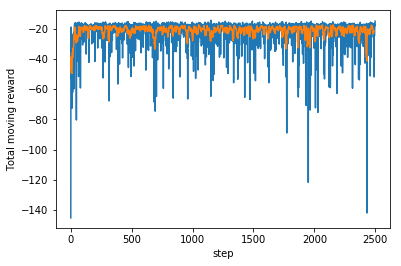

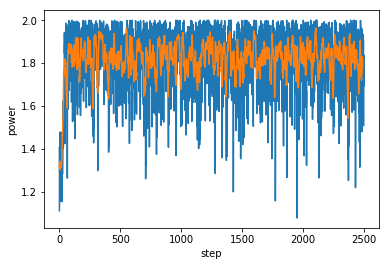

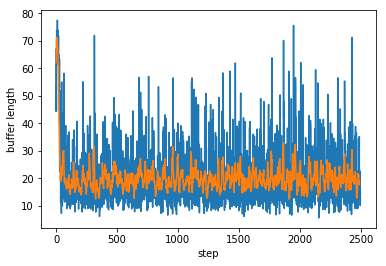

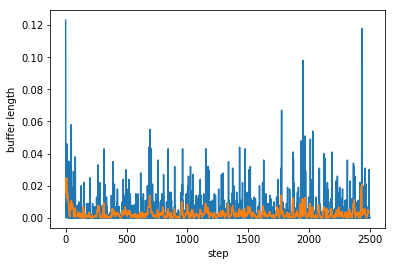

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])